In [1]:
import numpy as np
import matplotlib.pyplot as plt
from elemento2D import ElTriTC

Declaramos dos elementos usando la siguiente definición:

__ElTriTC(x, y, n, k, h12=0, h23=0, h31=0, q12=0, q23=0, q31=0, Q=0)__

* __x__: es el vector de las coordenadas $x$ ($m$).
* __y__: es el vector de las coordenadas $y$ ($m$).
* __n__: son los números de nodos (números enteros, empezando en 1).

Los siguientes parámetros son optativos (si el fenómeno no existe podemos dejar que tomen el valor por defecto, 0.
* __h12__ constante de convección del lado 12 ($W/m^2°C$).
* __h23__ constante de convección del lado 23 ($W/m^2°C$).
* __h31__ constante de convección del lado 31 ($W/m^2°C$).
* __q12__ flujo de calor conocido del lado 12 ($W/m^2$).
* __q23__ flujo de calor conocido del lado 23 ($W/m^2$).
* __q31__ flujo de calor conocido del lado 31 ($W/m^2$).
* __Q__ generación de calor en el elemento, promedio o constante ($W/m^3$).

En el caso de los problemas con convección la __qxx__ correspondiente al lado toma el valor de: $q = hT_{\infty}$


Damos de alta dos elementos.

In [2]:
e01 = ElTriTC([0,3,0],[0,0,3],[1,2,3],50,q31=25,Q=40)
e02 = ElTriTC([0,3,3],[3,3,0],[3,4,2],50,Q=40)

Graficamos los elementos para verificar la información

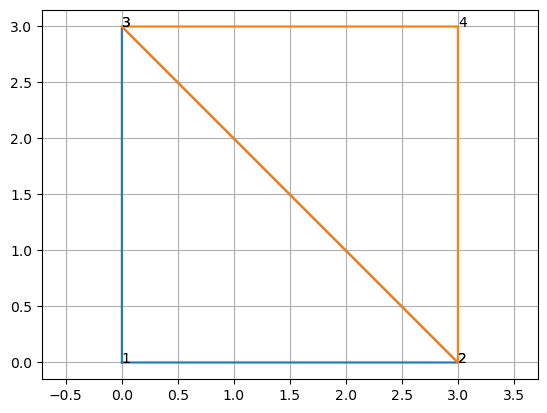

In [3]:
plt.figure()
e01.Grafica()
e02.Grafica()
plt.grid()
plt.axis('equal')
plt.show()

La matriz de conductividad del primer elemento es:

In [4]:
e01.MatrizK()

array([[ 50., -25., -25.],
       [-25.,  25.,   0.],
       [-25.,   0.,  25.]])

Para ensamblar usamos `expNodos` con el número total de modos y sumamos las matrices:

In [5]:
K = e01.MatrizK(expNodos=4)+e02.MatrizK(expNodos=4)
K

array([[ 50., -25., -25.,   0.],
       [-25.,  50.,   0., -25.],
       [-25.,   0.,  50., -25.],
       [  0., -25., -25.,  50.]])

De la misma manera para el vector fuerza:

In [6]:
e01.VectorF()

array([97.5, 60. , 97.5])

In [7]:
F = e01.VectorF(expNodos=4)+e02.VectorF(expNodos=4)

Imponemos las condiciones de frontera de Dirichlet (temperatura conocida).

In [8]:
K[1] = [0,1,0,0]
K[2] = [0,0,1,0]
K

array([[ 50., -25., -25.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0., -25., -25.,  50.]])

In [9]:
F[1] = 300
F[2] = 300
F

array([ 97.5, 300. , 300. ,  60. ])

In [10]:
np.linalg.solve(K,F)

array([301.95, 300.  , 300.  , 301.2 ])

In [11]:
e01.out_xlsx('e01.xlsx', 4)
e02.out_xlsx('e02.xlsx', 4)